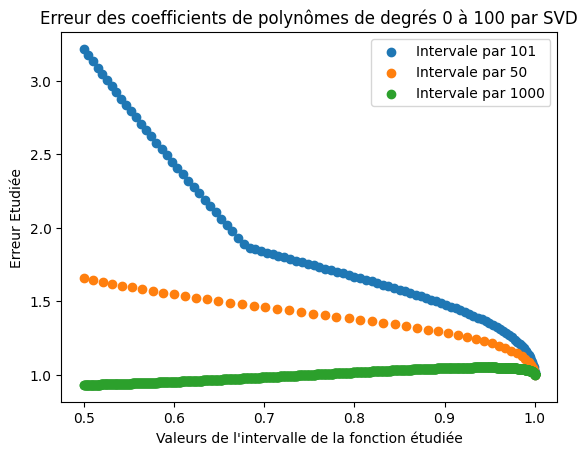

In [28]:
# 1 Approximation de fonctions par des polynômes

from numpy import c_, ndarray, array
from numpy.linalg import svd, solve
from matplotlib.pyplot import scatter, title, xlabel, ylabel, legend

from math import exp

# intervale entre [-1, 1]

def funcByIntervale(func, start: float, end: float, split : int) -> list:
    rectifer = (end - start) / (split - 1)
    x = [round(start + rectifer * i, 3) for i in range(split)]
    return x, [func(i) for i in x]

def normalEquation(A: ndarray, b:  ndarray):
    return A.T@A, A.T@b

def svdAplus(A: ndarray):
    u, e, v = svd(A)
    ePlusVal = array([0 if i == 0 else 1 / i for i in e])
    ePlus = array([[ePlusVal[i] if i == j  else 0 for i in range(A.shape[0])] for j in range(A.shape[1])])
    return v.T @ ePlus @ u.T

def polynomeCoefsBySplit(method: str, n: int):
    sorted: list = []
    for k in range(d):
        x, y = funcByIntervale(func, -1, 1, n)
        A = c_[[[j**i for i in range(k + 1, -1, -1)] for j in x]]
        x_: ndarray
        if method == "Normale":
            A_, b_ = normalEquation(A, y)
            x_ = solve(A_, b_)
        elif method == "SVD":
            aPlus = svdAplus(A)
            x_ = aPlus @ y
        sorted.append(x_)
    return sorted

def estimateValuePolynome(coefs: ndarray, x: float):
    return sum([j * x for j in coefs])

def error(var1: float, var2: float):
    return abs(var1 - var2)

def main(n: int):
    xs, ys = funcByIntervale(func, 0, 1, n)
    allPoly: list = polynomeCoefsBySplit(method, n)
    errors: list = []
    for x, y in zip(xs, ys):
        e = max([error(estimateValuePolynome(i, x), y) for i in allPoly])
        errors.append(e)
    return errors, ys

# 1 . Fonction exponentielle

d = 100 # dégrés de polynôme étudiés
allN: list = [d + 1, 50, 1000] # L'ensembles des point distincts de l'intervale
method: str = "SVD" # Editable in normalEquation and svdAplus
func = exp # Editable in exp and lambda x: 1/(1+x**2)

legends = []
for i in allN:
    scatter(main(i)[1], main(i)[0])
    xlabel("Valeurs de l'intervalle de la fonction étudiée")
    ylabel("Erreur Etudiée")
    legends.append(f"Intervale par {i}")
title(f"Erreur des coefficients de polynômes de degrés 0 à {d} par {method}")
legend(legends)

In [1]:
from math import radians

print(radians(-3))

-0.05235987755982989


In [19]:
from numpy import ones, c_, array

m = c_[[i for i in range(5)], [i**2 for i in range(5)]]
print(m)
print(array([[0 if i == 0 else 1 / i for i in j] for j in m]))


[[ 0  0]
 [ 1  1]
 [ 2  4]
 [ 3  9]
 [ 4 16]]
[[0.         0.        ]
 [1.         1.        ]
 [0.5        0.25      ]
 [0.33333333 0.11111111]
 [0.25       0.0625    ]]
